# **Aula 04 - Regressão pt. 2**

In [215]:
import numpy as np
import os

#Para plotar imagens mais bonitinhas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Para conseguir reproduzir os mesmos resultados 
np.random.seed(42)

#Caminho definido para salvar as imagens
#Mude-o de acordo com o diretório que você deseja salvar suas imagens
DIR = "/Aula04_regressao_pt2/"

#Se a pasta ainda não foi criada, então vamos cria-la
if not os.path.isdir(DIR):
      os.makedirs(DIR)
      print("Criando pasta")

#Função para salvar as imagens na pasta
def salvar_figura(fig_id, tight_layout=True):
    path = os.path.join(DIR, fig_id + ".png")
    print("Salvando figura", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## **Regressão Linear**



> A Função `rand()` do `numpy` gera valores aleatorios entre 0 e 1. Na célula de códgio abaixo, estamos criando uma matriz 100x1 com valores alteatórios, que ao multiplicarmos por 2, teremos valores entre 0 e 2, mas ainda com uma distribuição uniforme.

In [216]:
#Gerar dados sintéticos para X
import numpy as np

X = 2 * np.random.rand(100,1) 
y = 4 + 3 * X + np.random.randn(100,1)

Salvando figura generated_data_plot


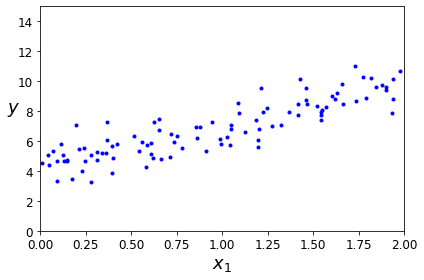

In [217]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
salvar_figura("generated_data_plot")
plt.show()

In [218]:
#Regressão Linear com Equação Normal
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 para cada instância.
#Lembrando que isso é necessário para fazer a Equação Normal na forma vetorial
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best #array com os pesos encontrados pela equação normal

array([[4.21509616],
       [2.77011339]])

In [219]:
#Buscando as predições para esses dois valores de x
X_new_b = np.array([[1,0], [1,2]])

#Para obter a predição da regressão linear, basta multiplicar o array com os dados com o array dos pesos
y_pred = X_new_b.dot(theta_best)
y_pred 

array([[4.21509616],
       [9.75532293]])

Salvando figura linear_model_predictions


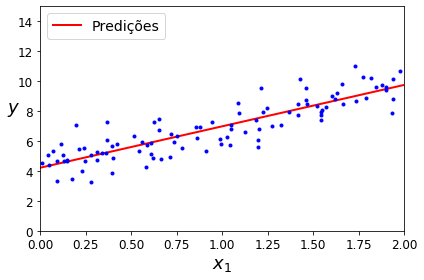

In [220]:
#Plotando os dados com a reta através da Regressão Linear.
# X_new_b[:,1] --> pegando todas as linhas de X_new_b, mas apenas a 2 segunda coluna, ou seja, a coluna de indice 1
plt.plot(X_new_b[:,1], y_pred, "r-", linewidth=2, label="Predições")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
salvar_figura("linear_model_predictions")
plt.show()

### **Gradiente Descendente para Regressão Linear**
> Cada iteração do Gradiente Descendente na vetorial: $$
\theta^{(proximo)} = \theta - \alpha \frac{2}{n}\bf{X}^T \cdot (\bf{X} \cdot \theta - \bf{y})
$$

In [221]:
#Saber o formato de um array.
#Este retorna uma tupla onde o primeiro elemento é o número de linhas e o segundo o numero de colunas
X.shape 

(100, 1)

In [222]:
from sklearn.metrics import mean_squared_error

alpha = 0.1 #taxa de aprendizado
iteracoes = 2000 # número de iterações até parar.
theta = np.random.randn(2,1) #Theta inicial (aleatorio)

for i in range(iteracoes):
  gradients = 2/X.shape[0] * X_b.T.dot(X_b.dot(theta) - y) #Calculando a derivada parcial da função de erro
  theta = theta - alpha * gradients #calculando o restante da operação e atualizando os pesos (theta)
  if i % 100 == 0: #a cada 100 iterações, mostrar o valor dos thetas e o erro.
    y_pred = X_b.dot(theta)
    print(" Iteração: ", i)
    print(f"theta0: {theta[0,0]} - theta1: {theta[1,0]} --> MSE: {mean_squared_error(y[:,0],y_pred[:,0])}") 
    print("=====================================")

 Iteração:  0
theta0: 1.1010328403533507 - theta1: 2.568958101964256 --> MSE: 11.732040954499762
 Iteração:  100
theta0: 4.162879942025337 - theta1: 2.8162174665401207 --> MSE: 0.8074080264625033
 Iteração:  200
theta0: 4.213443783921037 - theta1: 2.771572342535492 --> MSE: 0.8065853885788592
 Iteração:  300
theta0: 4.215043868452802 - theta1: 2.7701595548662734 --> MSE: 0.8065845647928161
 Iteração:  400
theta0: 4.215094502866896 - theta1: 2.7701148474308535 --> MSE: 0.8065845639678804
 Iteração:  500
theta0: 4.215096105184674 - theta1: 2.7701134326713492 --> MSE: 0.8065845639670541
 Iteração:  600
theta0: 4.215096155889759 - theta1: 2.7701133879015156 --> MSE: 0.8065845639670535
 Iteração:  700
theta0: 4.215096157494313 - theta1: 2.7701133864847813 --> MSE: 0.8065845639670534
 Iteração:  800
theta0: 4.21509615754509 - theta1: 2.7701133864399483 --> MSE: 0.8065845639670531
 Iteração:  900
theta0: 4.215096157546695 - theta1: 2.770113386438531 --> MSE: 0.8065845639670534
 Iteração:  100

In [223]:
theta_gd = theta
theta_gd

array([[4.21509616],
       [2.77011339]])

In [224]:
theta_equacao_normal = theta_best

In [225]:
theta_equacao_normal

array([[4.21509616],
       [2.77011339]])

**Gradiente Descendente com diferentes taxas de aprendizado**

In [226]:
def plot_gradient_descent(theta, alpha, lista_thetas=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new_b[:,1], y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        if lista_thetas is not None:
            lista_thetas.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

Salvando figura gradient_descent_plot_diferentes_alfas


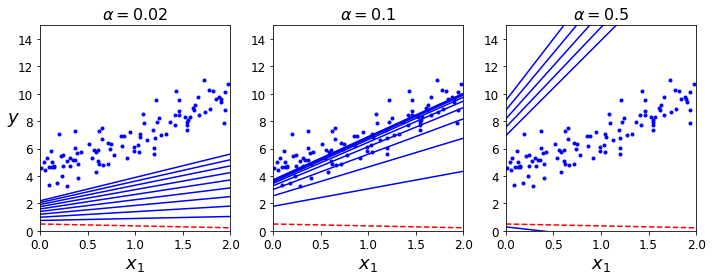

In [227]:
np.random.seed(42)
theta = np.random.randn(2,1)  # inicialização aleatória

lista_thetas_bgd = [] #Armazena as predições dos BGDs com diferentes alpha

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, alpha=0.1, lista_thetas=lista_thetas_bgd)
plt.subplot(133)
plot_gradient_descent(theta, alpha=0.5)

salvar_figura("gradient_descent_plot_diferentes_alfas")
plt.show()

### **Stochastic Gradient Descent (SGD)**

In [228]:
#Função retorna o tamanho (número de itens) de um objeto.
#Nesse caso, o número de elementos no array.
len(X_b) 

100

In [229]:
X_new = X_new_b[:,1] #pegando somente os dados de X_new_b, ou seja, exceto a coluna de 1's
lista_thetas_sgd = [] #armazena-ra a lista de thetas do algoritmo SGD
n = len(X_b) 
np.random.seed(42)

Salvando figura sgd_plot


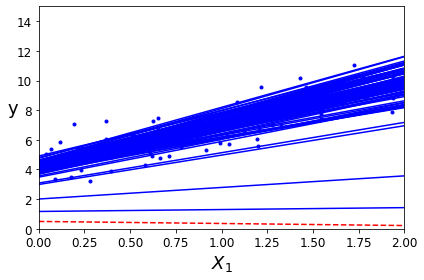

In [230]:
#Algoritmo SGD
n_epocas = 20 

# hiperparâmetros - constante1 (t0) e constante2 (t1)
t0, t1 = 5, 50 

# Heurisitica usada para diminuir gradativamente o alpha (taxa de aprendizado)
def diminuir_taxaAprendizado(t):
    return t0 / (t + t1)

# escolhendo os thetas iniciais aleatoriamente.
theta = np.random.randn(2,1)

for epoca in range(n_epocas):
    for i in range(n):
        #plotar as 20 primeiras iterações do SGD
        if epoca == 0 and epoca < 20:
            y_pred = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_pred, style)
        
        #Seleciona aleatoriamente a instância dos dados que será usada para resolver o SGD
        random_index = np.random.randint(n)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        #Predição do theta encontrado
        yi_pred = xi.dot(theta)
        #resolução da derivada do custo
        gradients = 2 * xi.T.dot(yi_pred - yi) 
        
        #Heuristica para diminuir o valor de alpha ao longo das iterações
        t = epoca * n + 1
        alpha = diminuir_taxaAprendizado(t)
        
        #Atualização dos thetas
        theta = theta - alpha * gradients
        
        #Adiciona o theta em uma lista para comparação posterior
        lista_thetas_sgd.append(theta)
        
#Plota        
plt.plot(X,y,"b.")
plt.xlabel("$X_1$", fontsize = 18)
plt.ylabel("y", fontsize = 18, rotation = 0)
plt.axis([0,2,0,15])
salvar_figura("sgd_plot")
plt.show()
            
            

                                         

> ***Observação:*** 
  - Por convenção, fazemos rodadas de `n` iteração; cada rodada é chamada de `epoca`. 
  - Enquanto no BGD executamos 1000 rodadas no código usando todo o dataset, com SGD conseguimos bons resultados apenas com 50 dessas rodadas.

In [231]:
theta_sgd = theta

In [232]:
theta_sgd #Melhor theta encontrado pelo SGD

array([[4.17783723],
       [2.77718628]])

In [233]:
theta_equacao_normal #Melhor theta encontrado pelo SGD

array([[4.21509616],
       [2.77011339]])

In [234]:
theta_gd ##Melhor theta encontrado pelo BGD

array([[4.21509616],
       [2.77011339]])

#### **SGD com Sci-kit Learn**

In [235]:
#Usando SGD no sci-kit learn
from sklearn.linear_model import SGDRegressor

In [236]:
#Retorna um array 1D
y[:5].ravel() 

array([6.33428778, 9.40527849, 8.48372443, 5.60438199, 4.71643995])

In [237]:
sgd_lin_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_lin_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [238]:
#Thethas sci-kit learn
# theta0 = intercept e theta1 em diante = coef_
sgd_lin_reg.intercept_, sgd_lin_reg.coef_

(array([4.16782089]), array([2.72603052]))

### **Mini-Batch Gradient Descent (miniBGD)**

In [239]:
#Armazenar os thetas das iterações do algoritmo
lista_thetas_mgd = [] 
np.random.seed(42)

n_iteracoes = 50
tam_minibatch = 20

#defindo theta aleatorio
theta = np.random.randn(2,1) 

#Parametros heuristica
t0, t1 = 200, 1000
t = 0;
def diminuir_taxaAprendizado(t):
    return t0 / (t + t1)

for i in range(n_iteracoes):
    #mistura a ordem das instâncias do dataset
    indices_misturados = np.random.permutation(n)
    X_b_misturados = X_b[indices_misturados]
    y_misturados = y[indices_misturados]
    
    for j in range(0, n, tam_minibatch):
        t += 1
        #Pega a quantidade de instâncias estipulada pelo parametro tam_minibatch par resolver o algoritmo
        xi = X_b_misturados[j:j+tam_minibatch]
        yi = y_misturados[j:j+tam_minibatch]
        yi_pred = xi.dot(theta)
        
        #Resolve a derivada do custo
        gradientes = 2/tam_minibatch * xi.T.dot(yi_pred - yi)
        
        #heuristica para diminuir alpha
        alpha = diminuir_taxaAprendizado(t)
        
        #atualiza os thetas
        theta = theta - alpha * gradientes
        
        #armazena na lista
        lista_thetas_mgd.append(theta)
        

In [240]:
theta, theta_sgd, theta_best, theta_gd

(array([[4.25214635],
        [2.7896408 ]]),
 array([[4.17783723],
        [2.77718628]]),
 array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]]))

### **Comparação GDs**

In [241]:
#Juntando os resultados dos thetas em arrays numpy para plotar a comparação
lista_thetas_mgd = np.array(lista_thetas_mgd)
lista_thetas_sgd = np.array(lista_thetas_sgd)
lista_thetas_bgd = np.array(lista_thetas_bgd)

In [242]:
len(lista_thetas_sgd)

2000

Salvando figura plot_comparacao_GDs


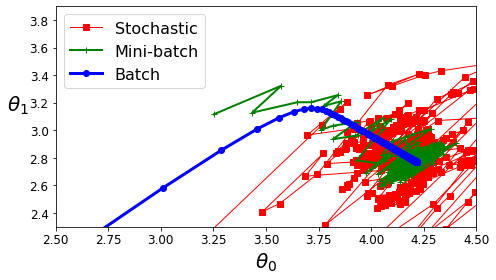

In [243]:
#plotando comparação
plt.figure(figsize=(7,4))

plt.plot(lista_thetas_sgd[:, 0], lista_thetas_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(lista_thetas_mgd[:, 0], lista_thetas_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(lista_thetas_bgd[:, 0], lista_thetas_bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
salvar_figura("plot_comparacao_GDs")
plt.show()

## **Regressão Polinomial** ##

> Primeiro, vamos gerar alguns dados não lineares, com base em uma equação quadrática simples ($y = ax^2 + bx + c$).

In [244]:
#Gerando dados de acordo com um função quadrática
n = 100;
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n,1)

Salvando figura dados_dist_funcao_quadratica


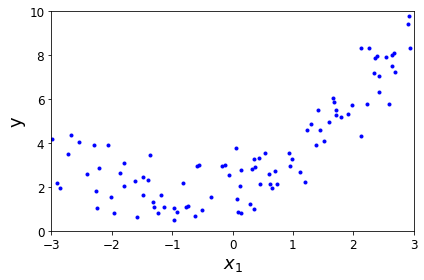

In [245]:
#Plotar dados
plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.axis([-3,3,0,10])
salvar_figura("dados_dist_funcao_quadratica")
plt.show()

> Uma linha reta não seria adequada para esse tipo de distribuição.
> Vamos usar a função do Scikit-Learn `PolynomialFeatures` para adicionar graus polinomiais a nossos atributos.
> - nesse caso 2ª grau, ou seja, elevar o atributo $x_1$ ao quadrado e adicioná-lo como uma novo atributo $x_2 = x_1^2$

In [246]:
#importando a classe para fazer a transformação do dataset
from sklearn.preprocessing import PolynomialFeatures

In [247]:
?PolynomialFeatures #abre a documentação da classe

Object `PolynomialFeatures #abre a documentação da classe` not found.


In [248]:
#pegando os atributos polinomiais
# parametro degree para escolher o grau polinomial
# include_bias = True adiciona a coluna de 1's para representar o x0
poly_atributos = PolynomialFeatures(degree=2, include_bias = False)

In [249]:
#Transformando o dataset adicionando os novos atributos com grau polinomial
X_poly = poly_atributos.fit_transform(X) 
X[:5] #original dataset

array([[ 2.38942838],
       [ 1.66081999],
       [-2.54112027],
       [ 2.92037461],
       [-1.37180422]])

In [250]:
X_poly[:5] #transformado dataset

array([[ 2.38942838,  5.709368  ],
       [ 1.66081999,  2.75832305],
       [-2.54112027,  6.45729221],
       [ 2.92037461,  8.52858786],
       [-1.37180422,  1.88184681]])

> `X_poly` agora contém o atributo original mais o quadrado desse atributo.
> Agora podemos treinar um modelo de regressão linear com esses novos dados

In [251]:
from sklearn.linear_model import LinearRegression
lin_reg_poly = LinearRegression()

In [252]:
lin_reg_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
#Valores de theta
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [254]:
#Como se fossem os valores de uma função do 2ª grau
print(f"a:{lin_reg_poly.coef_[0,1]} \nb:{lin_reg_poly.coef_[0,0]} \nc:{lin_reg_poly.intercept_[0]}")

a:0.5257703217604497 
b:0.9503853846016609 
c:1.973523304949662


A função `linspace()` Retorna números espaçados uniformemente em um intervalo especificado. No caso abaixo, vamos ter 100 número entre -3 e 3.

In [255]:
# X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new[:5]
X_new_poly = poly_atributos.transform(X_new)
y_new_pred = lin_reg_poly.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new_pred, "r-", linewidth=2, label="Predições")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
salvar_figura("predicao_polinomial_plot")
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## **Curvas de Aprendizado**

***Pipeline***

> Existem muitas etapas de transformação de dados que precisam ser executadas na ordem correta. Felizmente, o Scikit-Learn fornece a classe `Pipeline` para ajudar com essas seqüências de transformações.

> O construtor do `Pipeline` pede uma lista de pares (nome/estimador), definindo uma sequência de etapas. Todos, exceto o último estimador, devem ser transformadores (ou seja, eles devem ter um método `fit_transform ()`).

> Quando chamamos o método `fit()` do pipeline (`poly_reg_pipeline.fit(X_treino, y_treino)`), ele chama os métodos `fit_transform()` sequencialmente em todos os transformadores, passando a saída de cada chamada como parâmetro para a próxima chamada, até atingir o estimador final, para o qual chama apenas o método `fit()` do mesmo.

> Para saber um pouco mais, leiam o artigo do Data Hackers ["Como Usar Pipelines no Scikit-Learn"](https://medium.com/data-hackers/como-usar-pipelines-no-scikit-learn-1398a4cc6ae9)

**StandardScaler**
>Reescala valores dos atributos deixando-os com uma distribuição Gaussiana de média = 0  e desvio padrão = 1. Abaixo segue a equação utilizada:
 $$ x'_i = \frac{x_i - \mu}{\sigma} $$

- $x_i$ é o valor original
- $x'_i$ é o valor transformado
- $\mu$ média dos valores do atributo
- $\sigma$ desvio padrão dos valores do atributo

Se quiserem um pouco mais de informações a respeito de Padronização e Normalização dos dados deem uma olhada neste artigo do [Data Hackers](https://medium.com/data-hackers/normalizar-ou-padronizar-as-variáveis-3b619876ccc9)
 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for estilo, largura_traco, grau_polinomio in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=grau_polinomio, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    poly_reg_pipeline = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    poly_reg_pipeline.fit(X, y)
    y_newbig = poly_reg_pipeline.predict(X_new)
    plt.plot(X_new, y_newbig, estilo, label=str(grau_polinomio), linewidth=largura_traco)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
salvar_figura("comparacao_graus_polinomial_plot")
plt.show()

### **Verificando erros do modelo com Validação Cruzada (CV)**

In [ ]:
from sklearn.metrics import mean_squared_error

#função verificar erro treino
def verificar_erro_treino(grau_polinomio, X_treino, y_treino):
    
    polybig_features = PolynomialFeatures(degree=grau_polinomio, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    poly_reg_pipeline = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    poly_reg_pipeline.fit(X_treino, y_treino)
    y_pred = poly_reg_pipeline.predict(X_treino)
    return mean_squared_error(y_treino, y_pred)


**train_test_split()**

> Separa o dataset aleatoriamente entre treino e teste. Para saber mais detalhes vocês podem consultar a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split)

In [ ]:
#Verificando o erro no treino do algoritmo
from sklearn.model_selection import train_test_split

#Separando o dataset entre treino (80% dos dados) e teste (20% dos dados)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#buscando o erro das regressões com graus 2, 1 e 300
pred_reg_2 = verificar_erro_treino(2, X_treino, y_treino)
pred_reg_1 = verificar_erro_treino(1, X_treino, y_treino)
pred_reg_300 = verificar_erro_treino(300, X_treino, y_treino)

pred_reg_2, pred_reg_1, pred_reg_300

In [ ]:
from sklearn.model_selection import cross_val_score

#Função verificar erro com validação cruzada
def verificar_erro_VC(grau_polinomio, X_treino, y_treino):
    
    polybig_features = PolynomialFeatures(degree=grau_polinomio, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    poly_reg_pipeline = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    poly_reg_pipeline.fit(X_treino, y_treino)
    y_pred = poly_reg_pipeline.predict(X_treino)
    return -cross_val_score(poly_reg_pipeline, X_treino, y_treino, cv=5, scoring="neg_mean_squared_error")

In [ ]:
pred_reg_2_VC = verificar_erro_VC(2, X_treino, y_treino)
print("MSE por partição: ", pred_reg_2_VC)
print("MSE média: ", pred_reg_2_VC.mean())

In [ ]:
#Validação Cruzada execução
pred_reg_2_VC = verificar_erro_VC(2, X_treino, y_treino)
pred_reg_1_VC = verificar_erro_VC(1, X_treino, y_treino)
pred_reg_300_VC = verificar_erro_VC(300, X_treino, y_treino)

#Printando as médias das partições de cada modelo de regressão.
pred_reg_2_VC.mean(), pred_reg_1_VC.mean(), pred_reg_300_VC.mean()


### ***Verificando erros do modelo com Curvas de Aprendizado***

In [ ]:
#Função das curvas de aprendizado

def curvas_aprendizado(modelo, X, y):
    #Divide os dados
    X_treino, X_val, y_treino, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Armazena os resultados
    treino_erros, val_erros = [], []
    
    for m in range(1, len(X_treino)):
        #treina cada vez com 1 instancia, depois com 2, depois com 3, e etc.
        modelo.fit(X_treino[:m], y_treino[:m])
        
        #Faz a predição no treino
        y_treino_pred = modelo.predict(X_treino[:m])
        
        #Faz a predição da validação
        y_val_pred = modelo.predict(X_val)
        
        #Armazena os resultados
        treino_erros.append(mean_squared_error(y_treino[:m], y_treino_pred))
        val_erros.append(mean_squared_error(y_val, y_val_pred))
    
    #Plota os resultados na curva de aprenzido
    plt.plot(np.sqrt(treino_erros), "r-+", linewidth=2, label="treino")
    plt.plot(np.sqrt(val_erros), "b-", linewidth=3, label="validação")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("n_treino", fontsize=14)
    plt.ylabel("MSE", fontsize=14)    

In [ ]:
#Treinando modelos e plotando curvas de aprendizado
#modelo com underfitting
grau_polinomio = 1

polybig_features = PolynomialFeatures(degree=grau_polinomio, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

poly_reg_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

curvas_aprendizado(poly_reg_pipeline, X, y)

plt.title("Grau: " + str(grau_polinomio))
plt.axis([0, 80, 0, 3])                        
salvar_figura("curvaAprendizado_underfitting_plot")   
plt.show() 

***Analisando uma curva de aprendizado com Underfitting***
> - **Performance do treino**
    - Com poucas instâncias, o modelo foi bem, por isso que a curva começa em zero. 
    - Á medida que novas instâncias são adicionadas, torna-se impossível para o modelo predizer corretamente, pois os dados não são lineares.
    - o erro aumenta até atingir um platô;
    - agora adicionar novas instâncias não faz diferença
    
> - **Performance Validação**
    - Com poucas instâncias, o modelo é incapaz de generalizar adequadamente
    - Á medida que o modelo é treinado com mais instâncias o erro de validação diminui lentamente.
    - No entanto, uma linha reta não pode executar um bom trabalho de modelagem dos dados; 
    - o erro termina alto em um platô, muito próximo da outra curva.
    
> - **Conclusões**
    - Curvas de aprendizado são típicas de um modelo comunderfitting.
    - Ambas atingiram um platô, estão próximas e razoavelmente com erros altos.

> - **O que pode ser feito?**
    - Modelo com underfitting não melhoram se adicionarmos mais instâncias para treinamento
    - Necessário um modelo mais complexo ou criar melhores atributos.

In [ ]:
#Treinando modelos e plotando curvas de aprendizado
#Modelo com overffiting
grau_polinomio = 10

polybig_features = PolynomialFeatures(degree=grau_polinomio, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

poly_reg_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

curvas_aprendizado(poly_reg_pipeline, X, y)

plt.title("Grau: " + str(grau_polinomio))
plt.axis([0, 80, 0, 3])                        
salvar_figura("curvaAprendizado_overfitting_plot")   
plt.show()

***Analisando uma cruva de aprendizado com overfitting***

> - Semelhante a curva anterior com duas importantes diferenças:
    1. O erro no treino é muito menor que no modelo de Regressão Linear (grau = 1).
    2. Há um espaço entre as curvas. Isso significa que o modelo tem um desempenho bem melhor nos dados de treinamento do que nos dados de validação.

> - **Conclusões**
    - Curvas de aprendizado são típicas de um modelo com overffiting.

> - **O que pode ser feito?**
    - adicionar mais dados de treinamento
    - Reduzir o número de atributos
    - **Regularização:** manter os atributos, mas diminuir a magnitude dos parâmetros 𝜃

In [ ]:
#Treinando modelos e plotando curvas de aprendizado
#Modelo com configuração ideal
grau_polinomio = 2

polybig_features = PolynomialFeatures(degree=grau_polinomio, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

poly_reg_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

curvas_aprendizado(poly_reg_pipeline, X, y)

plt.title("Grau: " + str(grau_polinomio))
plt.axis([0, 80, 0, 3])                        
salvar_figura("curvaAprendizado_ideal_plot")   
plt.show()

***Analisando uma curva de aprendizado mais adequada***

> - **Principais características:**
    - Erro no treino baixo
    - Erro na validação próximo do erro do treino 

## **Regularização**

### **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

#Dados sintéticos para usar de exemplo
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

#Função para plotar os gráficos que comparam regressão linear e polinomial com diferentes
# lambdas
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\lambda = {}$".format(alpha))
        
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

salvar_figura("ridge_regression_plot")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
#o parâmetro alpha representa o parâmetro lambda dos slides e dos gráficos
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state = (42))
ridge_reg.fit(X,y)

In [ ]:
y_pred_ridge = ridge_reg.predict(X)

In [ ]:
mean_squared_error(y, y_pred_ridge)

In [ ]:
#Com stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# Parâmetro penalty representa o tipo de regularizando que será usado, nesse caso l2 representa a Ridge Regression
# Norma l2 é um outro nome usado para Ridge Regression
# Da mesma forma, norma l1 é usado para Lasso Regression
sgd_ridge = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state = 42)
sgd_ridge.fit(X, y.ravel())

In [ ]:
y_pred_sgd = sgd_ridge.predict(X)
mean_squared_error(y, y_pred_sgd)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

salvar_figura("lasso_regression_plot")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

In [ ]:
y_pred_lasso = lasso_reg.predict(X)
mean_squared_error(y, y_pred_lasso)

### **Elastic Net**

> - Elastic Net é um meio termo entre a Ridge e a Lasso Regression.
> - Quando `l1_ration = 0`, a Elastic Net é equivalente à Ridge, e quando`l1_ration = 1`, é equivalente à Lasso

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0, random_state=42)
elastic_net.fit(X, y)
y_pred_elasticNet = elastic_net.predict(X)
mean_squared_error(y, y_pred_elasticNet)

### **Regressão Logística**

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris

In [ ]:
import pandas as pd
#Transformando os dados em um data frame do pandas
df = pd.DataFrame(iris.data)
df.head()

In [ ]:
#Renomeando as colunas do data frame de acordo com o nome dos atributos do iris dataset
df.columns = iris.feature_names 
df.head()

In [ ]:
#Pegando os atributos alvo do dataset iris e criando um dataset
df_target = pd.DataFrame(iris.target)
df_target

In [ ]:
#Renomeando a coluna do atributo alvo
df_target.columns = {"tipo_flor"}
df_target.head()

In [ ]:
#Pegando apenas um dos atributos do dataset iris
X = pd.DataFrame(df["petal width (cm)"])
X.head()

In [ ]:
#Considerando apenas a classe 2 do dataset iris
# Onde tipo_flor == 2, então y = true, senão y = false
y = (df_target == 2)
y

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state = 42)
log_reg.fit(X, y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new[:5]

In [ ]:
?log_reg.predict_proba

In [ ]:
#criando valores entre 0 e 3 para servir como teste do modelo
#X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

#Pegando as probabilidades encontradas pelo modelo
y_proba = log_reg.predict_proba(X_new)

In [ ]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
salvar_figura("logistic_regression_plot")
plt.show()

In [ ]:
decision_boundary

In [ ]:
#Pega a predição do modelo (True = iris-virgina)
log_reg.predict([[2.1]])

In [ ]:
?LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Agora os dados tem dois atributos, altura e largura das petala
X = iris["data"][:, (2, 3)]  
y = (iris["target"] == 2).astype(np.int)

#Treinando modelo de regressão logistica. C representa um parâmetro para regularização do modelo
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

#Criando dados de teste
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

#Pegando as probabilidades dos dados de test
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

#Definidio o limite de decisão de acordo com os thetas encontrados pelo modelo
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

#Plotando limite de decisão
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

#Plotando texto no grafico
plt.text(3.5, 1.5, "Não-Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")

plt.xlabel("Altura da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
salvar_figura("logistic_regression_contour_plot")
plt.show()